<a href="https://colab.research.google.com/github/lagamaite/Colab-Notebooks/blob/master/Keras_Confidence_Interval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
###NN uses Relu, batches of 50 epochs, plots train/validate data###
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np 
import matplotlib.pyplot as plt 
import random
import scipy.stats as stats



print (tf.__version__) # 2.1.0

2.1.0


In [0]:


fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# returns 4 numpy arrays: 2 training sets and 2 test sets
# images: 28x28 arrays, pixel values: 0 to 255
# labels: array of integers: 0 to 9 => class of clothings
# Training set: 60,000 images, Testing set: 10,000 images

# class names are not included, need to create them to plot the images  
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



In [0]:
print("train_images:", train_images.shape)
print("test_images:", test_images.shape)

train_images: (60000, 28, 28)
test_images: (10000, 28, 28)


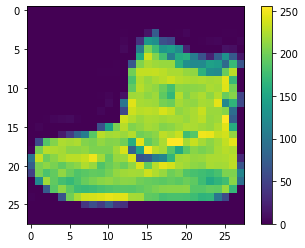

In [0]:


# Visualize the first image from the training dataset
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)



In [0]:
# scale the values to a range of 0 to 1 of both data sets
train_images = train_images / 255.0
test_images = test_images / 255.0

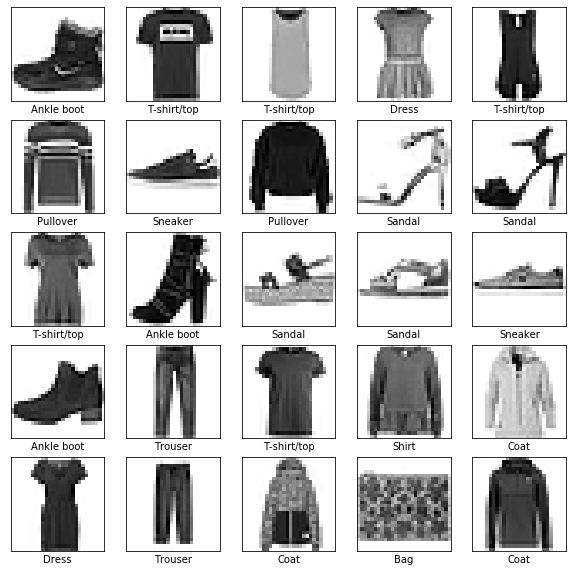

In [0]:
# display the first 25 images from the training set and 
# display the class name below each image
# verify that data is in correct format
plt.figure(figsize=(10,10))
for i in range(25):
	plt.subplot(5,5, i+1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(train_images[i], cmap=plt.cm.binary)
	plt.xlabel(class_names[train_labels[i]])

In [0]:
# Step 1 - Build the architecture
# Model a simple 3-layer neural network
model_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_3.summary() 

# Step 2 - Compile the model
model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Step 3 - Train the model, by fitting it to the training data
# 5 epochs, and split the training set into 80/20 for validation
model_3.fit(train_images, train_labels, epochs=5, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 41us/sample - loss: 0.5244 - accuracy: 0.8165 - val_loss: 0.4090 - val_accuracy: 0.8562
Epoch 2/5
48000/48000 [==============================] - 2s 35us/sample - loss: 0.3920 - accuracy: 0.8599 - val_loss: 0.3780 - val_accuracy: 0.8618
Epoch 3/5
48000/48000 [==============================] - 2s 35us/sample - loss: 0.3510 - accuracy: 0.8723 - val_loss: 0.3428 - val_accuracy: 0.8779
Epoch 4/5
48000/48000 [==============================] - 2s 35us/sample - loss: 0.3185 - accuracy: 0.8832 - val_loss: 0.3411 - val_accuracy: 0.8800
Epoch 5/5
48000/48000 [==============================] - 2s 34us/sample - loss: 0.3015 - accuracy: 0.8885 - val_loss: 0.3316 - val_accuracy: 0.8824


In [0]:
#Step 4 - Evaluate the model
test_loss, test_acc = model_3.evaluate(test_images, test_labels)
print("Model - 3 layers - test loss:", test_loss * 100)
print("Model - 3 layers - test accuracy:", test_acc * 100)

10000/10000 [==============================] - 0s 25us/sample - loss: 0.3613 - accuracy: 0.8704
Model - 3 layers - test loss: 36.125280978679655
Model - 3 layers - test accuracy: 87.04000115394592


In [0]:
# Model a simple 6-layer neural network 
model_6 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
#model_6.summary() 
model_6.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:


#Train the NN-6 with 5 epochs 
model_6.fit(train_images, train_labels, epochs=5, validation_split=0.2)

#Evaluate the model with test datasets
test_loss, test_acc = model_6.evaluate(test_images, test_labels)
print("Model - 6 layers - test loss:", test_loss * 100)
print("Model - 6 layers - test accuracy:", test_acc * 100)



Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 49us/sample - loss: 0.5163 - accuracy: 0.8136 - val_loss: 0.4305 - val_accuracy: 0.8453
Epoch 2/5
48000/48000 [==============================] - 2s 42us/sample - loss: 0.3871 - accuracy: 0.8579 - val_loss: 0.3740 - val_accuracy: 0.8651
Epoch 3/5
48000/48000 [==============================] - 2s 43us/sample - loss: 0.3479 - accuracy: 0.8719 - val_loss: 0.3729 - val_accuracy: 0.8630
Epoch 4/5
48000/48000 [==============================] - 2s 42us/sample - loss: 0.3236 - accuracy: 0.8801 - val_loss: 0.3475 - val_accuracy: 0.8744
Epoch 5/5
10000/10000 [==============================] - 0s 27us/sample - loss: 0.3916 - accuracy: 0.8599
Model - 6 layers - test loss: 39.15701839089394
Model - 6 layers - test accuracy: 85.98999977111816


In [0]:
# Model a simple 12-layer neural network 
model_12 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
#model_12.summary() 
model_12.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:


#5 epochs 
model_12.fit(train_images, train_labels, epochs=5, validation_split=0.2)

#evaluation
test_loss, test_acc = model_12.evaluate(test_images, test_labels)
print("Model - 12 layers - test loss:", test_loss * 100)
print("Model - 12 layers - test accuracy:", test_acc * 100)



Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 3s 68us/sample - loss: 0.6200 - accuracy: 0.7688 - val_loss: 0.4358 - val_accuracy: 0.8401
Epoch 2/5
48000/48000 [==============================] - 3s 63us/sample - loss: 0.4389 - accuracy: 0.8415 - val_loss: 0.4450 - val_accuracy: 0.8398
Epoch 3/5
48000/48000 [==============================] - 3s 66us/sample - loss: 0.3932 - accuracy: 0.8565 - val_loss: 0.4305 - val_accuracy: 0.8530
Epoch 4/5
48000/48000 [==============================] - 3s 64us/sample - loss: 0.3721 - accuracy: 0.8659 - val_loss: 0.4059 - val_accuracy: 0.8652
Epoch 5/5
10000/10000 [==============================] - 0s 35us/sample - loss: 0.4101 - accuracy: 0.8561
Model - 12 layers - test loss: 41.01434752225876
Model - 12 layers - test accuracy: 85.61000227928162


In [0]:
# NN-3, 16 epochs 
history_NN3_50=model_3.fit(train_images, train_labels, epochs=16, validation_split=0.2)

test_loss, test_acc = model_3.evaluate(test_images, test_labels)
print("Model - 3 layers - test loss:", test_loss * 100)
print("Model - 3 layers - test accuracy:", test_acc * 100)

Train on 48000 samples, validate on 12000 samples
Epoch 1/16
48000/48000 [==============================] - 2s 35us/sample - loss: 0.2861 - accuracy: 0.8938 - val_loss: 0.3302 - val_accuracy: 0.8802
Epoch 2/16
48000/48000 [==============================] - 2s 34us/sample - loss: 0.2723 - accuracy: 0.8989 - val_loss: 0.3223 - val_accuracy: 0.8825
Epoch 3/16
48000/48000 [==============================] - 2s 37us/sample - loss: 0.2595 - accuracy: 0.9033 - val_loss: 0.3209 - val_accuracy: 0.8857
Epoch 4/16
48000/48000 [==============================] - 2s 35us/sample - loss: 0.2501 - accuracy: 0.9063 - val_loss: 0.3472 - val_accuracy: 0.8792
Epoch 5/16
48000/48000 [==============================] - 2s 35us/sample - loss: 0.2405 - accuracy: 0.9103 - val_loss: 0.3225 - val_accuracy: 0.8869
Epoch 6/16
48000/48000 [==============================] - 2s 34us/sample - loss: 0.2324 - accuracy: 0.9122 - val_loss: 0.3166 - val_accuracy: 0.8890
Epoch 7/16
48000/48000 [==============================] 

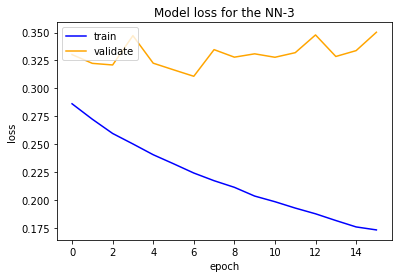

In [0]:


#Plot loss results for training data and testing data 
plt.plot(history_NN3_50.history['loss'], 'blue')
plt.plot(history_NN3_50.history['val_loss'], 'orange')
plt.title('Model loss for the NN-3')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')



In [0]:


# NN-6, 16 epochs
history_NN6_50=model_6.fit(train_images, train_labels, epochs=16, validation_split=0.2)

test_loss, test_acc = model_6.evaluate(test_images, test_labels)
print("Model - 6 layers - test loss:", test_loss * 100)
print("Model - 6 layers - test accuracy:", test_acc * 100)



Train on 48000 samples, validate on 12000 samples
Epoch 1/16
48000/48000 [==============================] - 2s 42us/sample - loss: 0.2900 - accuracy: 0.8919 - val_loss: 0.3425 - val_accuracy: 0.8735
Epoch 2/16
48000/48000 [==============================] - 2s 44us/sample - loss: 0.2776 - accuracy: 0.8965 - val_loss: 0.3260 - val_accuracy: 0.8878
Epoch 3/16
48000/48000 [==============================] - 2s 44us/sample - loss: 0.2681 - accuracy: 0.8992 - val_loss: 0.3411 - val_accuracy: 0.8835
Epoch 4/16
48000/48000 [==============================] - 2s 46us/sample - loss: 0.2577 - accuracy: 0.9026 - val_loss: 0.3218 - val_accuracy: 0.8859
Epoch 5/16
48000/48000 [==============================] - 2s 45us/sample - loss: 0.2466 - accuracy: 0.9055 - val_loss: 0.3305 - val_accuracy: 0.8868
Epoch 6/16
48000/48000 [==============================] - 2s 45us/sample - loss: 0.2398 - accuracy: 0.9093 - val_loss: 0.3325 - val_accuracy: 0.8828
Epoch 7/16
48000/48000 [==============================] 

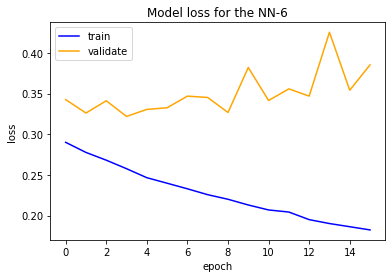

In [0]:


#Plot loss results for training data and testing data
plt.plot(history_NN6_50.history['loss'], 'blue')
plt.plot(history_NN6_50.history['val_loss'], 'orange')
plt.title('Model loss for the NN-6')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')



In [0]:


# NN-12, 16 epochs 
history_NN12_50=model_12.fit(train_images, train_labels, epochs=16, validation_split=0.2)

test_loss, test_acc = model_12.evaluate(test_images, test_labels)
print("Model - 12 layers - test loss:", test_loss * 100)
print("Model - 12 layers - test accuracy:", test_acc * 100)



Train on 48000 samples, validate on 12000 samples
Epoch 1/16
48000/48000 [==============================] - 3s 63us/sample - loss: 0.3412 - accuracy: 0.8785 - val_loss: 0.3667 - val_accuracy: 0.8755
Epoch 2/16
48000/48000 [==============================] - 3s 58us/sample - loss: 0.3227 - accuracy: 0.8849 - val_loss: 0.3785 - val_accuracy: 0.8636
Epoch 3/16
48000/48000 [==============================] - 3s 63us/sample - loss: 0.3151 - accuracy: 0.8879 - val_loss: 0.3549 - val_accuracy: 0.8799
Epoch 4/16
48000/48000 [==============================] - 3s 62us/sample - loss: 0.3076 - accuracy: 0.8905 - val_loss: 0.3767 - val_accuracy: 0.8748
Epoch 5/16
48000/48000 [==============================] - 3s 63us/sample - loss: 0.2934 - accuracy: 0.8944 - val_loss: 0.3676 - val_accuracy: 0.8727
Epoch 6/16
48000/48000 [==============================] - 3s 69us/sample - loss: 0.2914 - accuracy: 0.8955 - val_loss: 0.3489 - val_accuracy: 0.8781
Epoch 7/16
48000/48000 [==============================] 

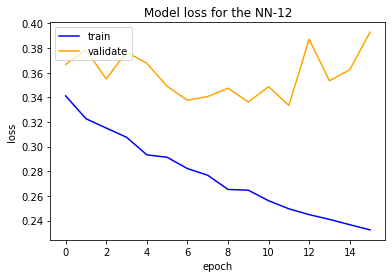

In [0]:
#Plot loss results for training data and testing data
plt.plot(history_NN12_50.history['loss'], 'blue')
plt.plot(history_NN12_50.history['val_loss'], 'orange')
plt.title('Model loss for the NN-12')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

In [0]:

'''
Confidences of accuracy of images- will be used in confidence interval
'''
# confidence of the model that the image corresponds to the label 
predictions = model_3.predict(test_images)
predictions.shape #(10000, 10)
predictions[0]



array([1.6070887e-09, 1.4375264e-14, 3.5491032e-09, 4.7775308e-07,
       6.9218875e-09, 5.1341751e-03, 3.1212768e-10, 5.5333931e-04,
       3.6786416e-09, 9.9431205e-01], dtype=float32)

In [0]:


np.argmax(predictions[0])



9

In [0]:


class_names[9]



'Ankle boot'

In [0]:
#Ankle boot has the highest confidence value 
test_labels[0]

9

In [0]:
# plot image in a grid
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
# plot the value array    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot= plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

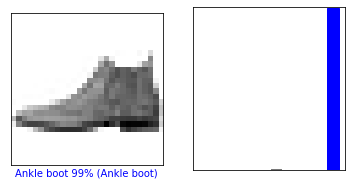

In [0]:


# look at 0th image, predictions, prediction array
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)



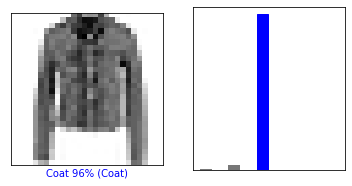

In [0]:


i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)



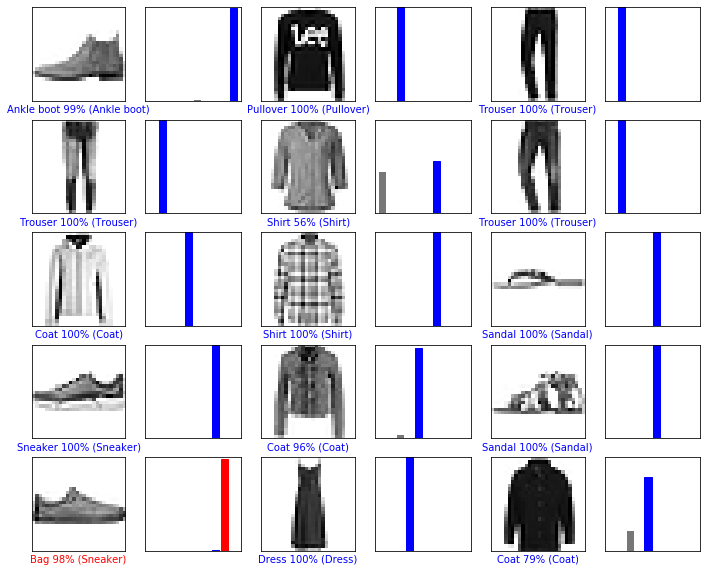

In [0]:
# Plot the first 15 test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plt.title("Predictions of the first 15 images, with NN-3")
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [0]:
predictions = model_12.predict(test_images)

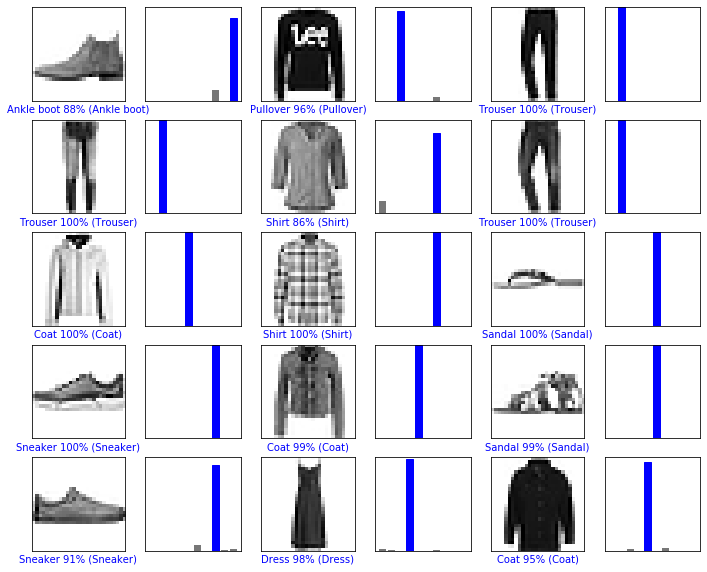

In [0]:
# Plot the first 15 test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plt.title("Predictions of first 15 images, with NN-12")
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

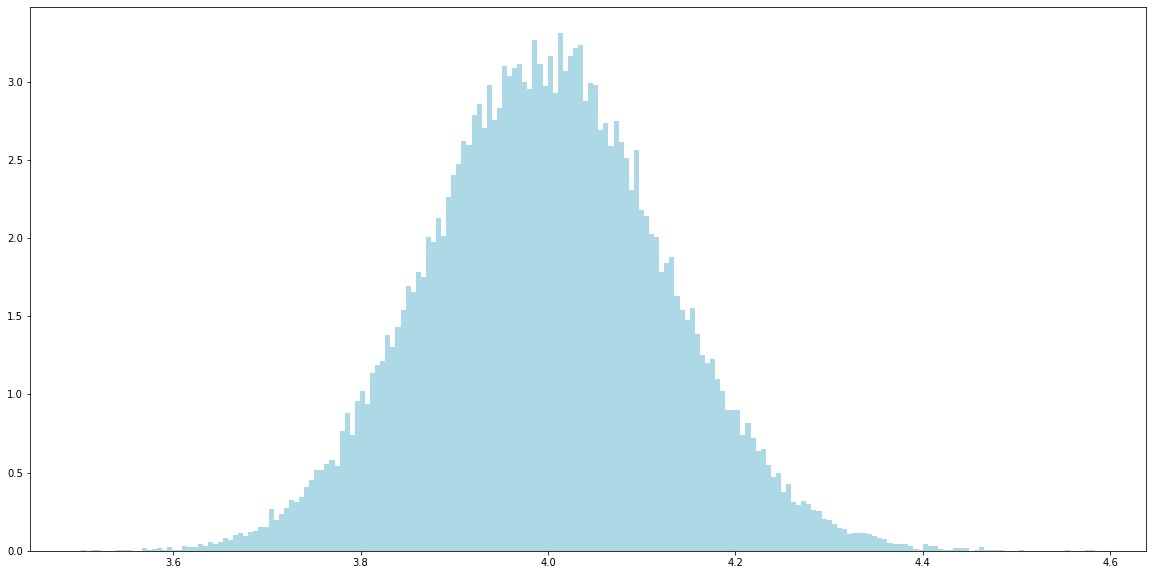

In [0]:
'''
Appending a sample confidence interval plotter/analyzer, will investigate how to integrate with the FashionMNIST
Walks through step-by-step how to plot/fill areas/etc.
'''
# use gamma distribution (shape param k and scale param s)
shape, scale = 2.0, 2.0  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 1000000)
mu = shape*scale # mean and standard deviation
sigma = scale*np.sqrt(shape)

# create sample mean distribution- will be replaced with mnist data
meansample = []
# sample size
samplesize = 500
for j in range(0,50000):
    # sampling 500 sample from population
    rc = random.choices(s, k=samplesize)
    # collect mean of each sample
    meansample.append(sum(rc)/len(rc))

#plots the distro of sample means
plt.figure(figsize=(20,10))
plt.hist(meansample, 200, density=True, color='lightblue')
plt.show()

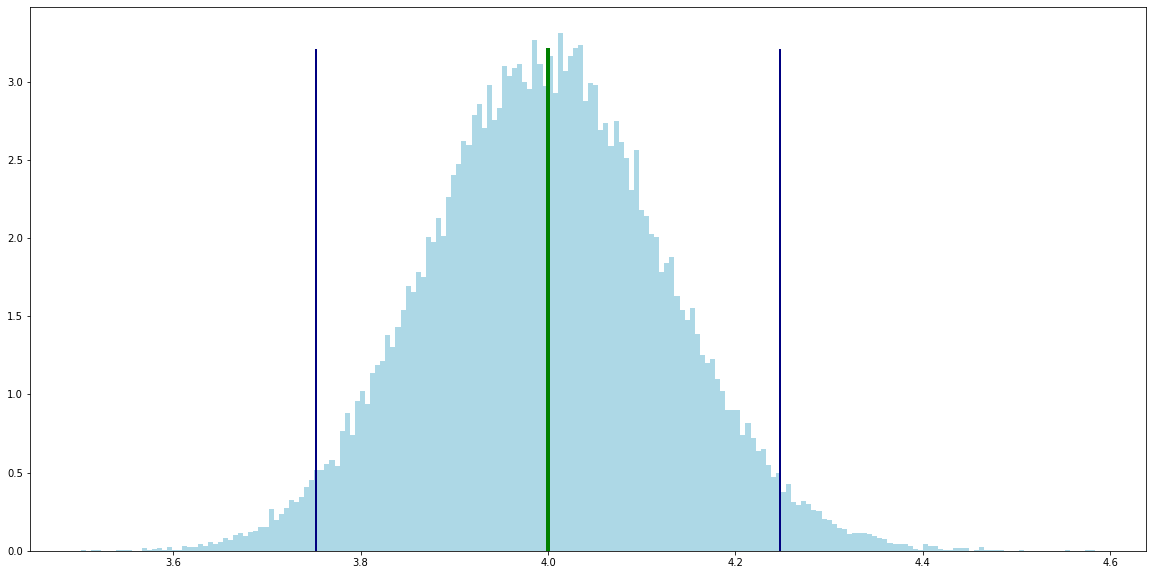

In [0]:


# set mean and 95% probability
plt.figure(figsize=(20,10))
plt.hist(meansample, 200, density=True, color='lightblue')
plt.plot([mu,mu],[0, 3.2], 'k-', lw=4, color='green')
# 95 percent of the data is within 1.96 standard devs from the mean
plt.plot([mu-(1.96*sigma/np.sqrt(samplesize)),mu-(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=2, color='navy')
plt.plot([mu+(1.96*sigma/np.sqrt(samplesize)),mu+(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=2, color='navy')
plt.show()



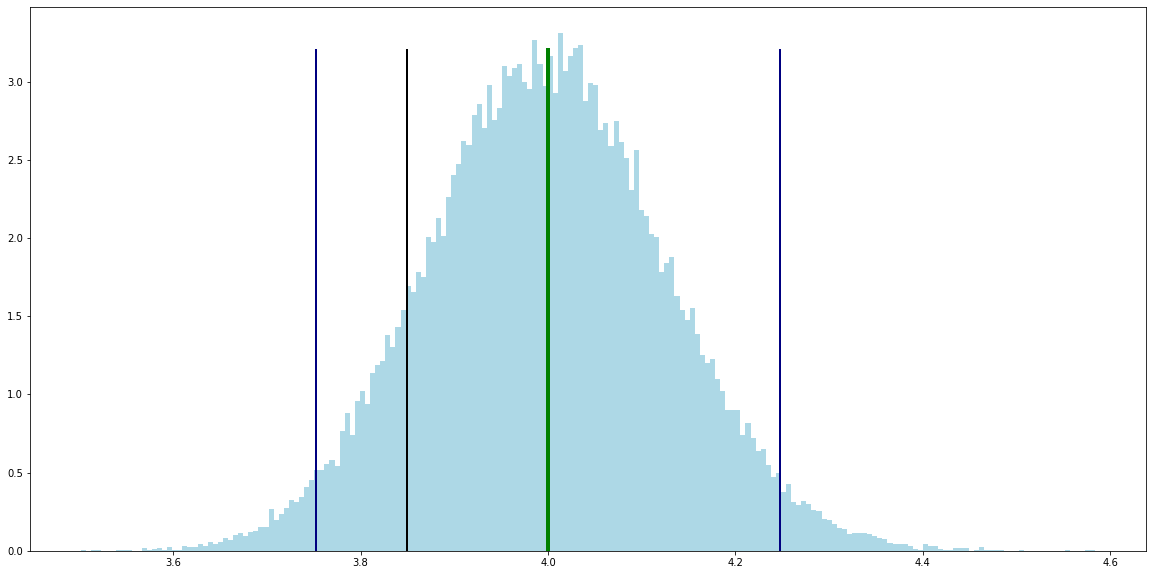

In [0]:
# suppose that we sample 500 data that has a mean as 3.85

# Xbar mean = 3.85, sigma = sigma/np.sqrt(samplesize)
# plots specific mean of a portion of sample data
m, ss = 3.85, sigma/np.sqrt(samplesize) # mean and standard deviation
plt.figure(figsize=(20,10))
plt.hist(meansample, 200, density=True, color='lightblue')
plt.plot([mu,mu],[0, 3.2], 'k-', lw=4, color='green')
plt.plot([mu-(1.96*sigma/np.sqrt(samplesize)),mu-(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=2, color='navy')
plt.plot([mu+(1.96*sigma/np.sqrt(samplesize)),mu+(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=2, color='navy')
plt.plot([m,m],[0, 3.2], 'k-', lw=2, color='black')
plt.show()

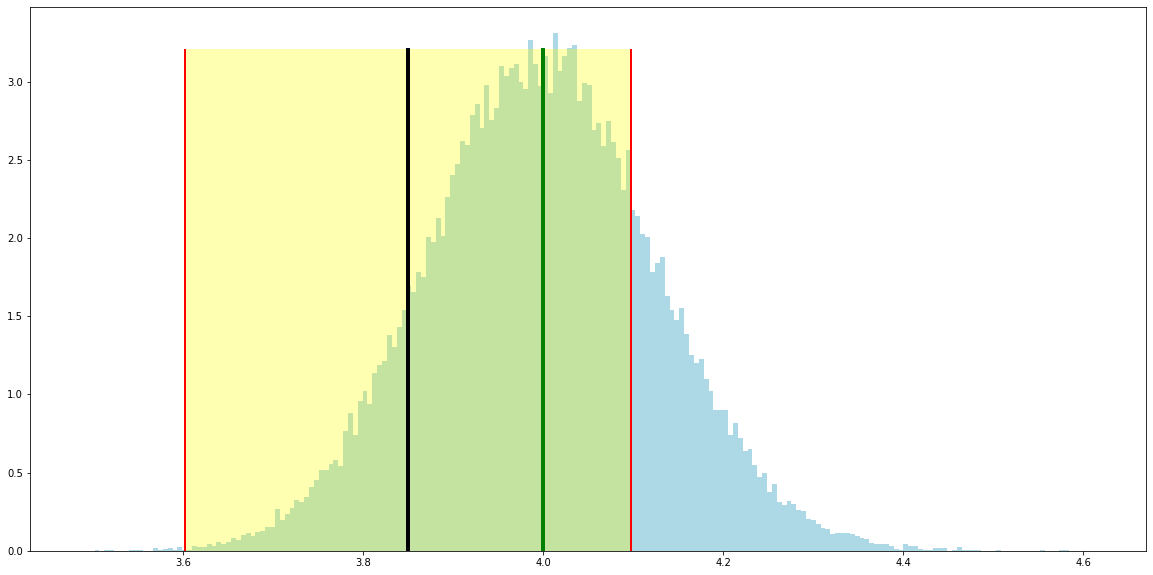

In [0]:
# create an interval around sample mean that we got
plt.figure(figsize=(20,10))

plt.hist(meansample, 200, density=True, color='lightblue')
plt.plot([mu,mu],[0, 3.2], 'k-', lw=4, color='green')
# plt.plot([mu-(1.96*sigma/np.sqrt(samplesize)),mu-(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=1, color='navy')
# plt.plot([mu+(1.96*sigma/np.sqrt(samplesize)),mu+(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=1, color='navy')
plt.plot([m,m],[0, 3.2], 'k-', lw=4, color='black')
plt.plot([m-(1.96*ss),m-(1.96*ss)],[0, 3.2], 'k-', lw=2, color='red')
plt.plot([m+(1.96*ss),m+(1.96*ss)],[0, 3.2], 'k-', lw=2, color='red')
# Create a Rectangle patch
plt.gca().add_patch(plt.Rectangle((m-(1.96*ss), 0),2*(1.96*ss),3.21, fill=True, linewidth=3, fc=(1,1,0,0.3)))
plt.xlim(3.43, 4.67) 
plt.show()

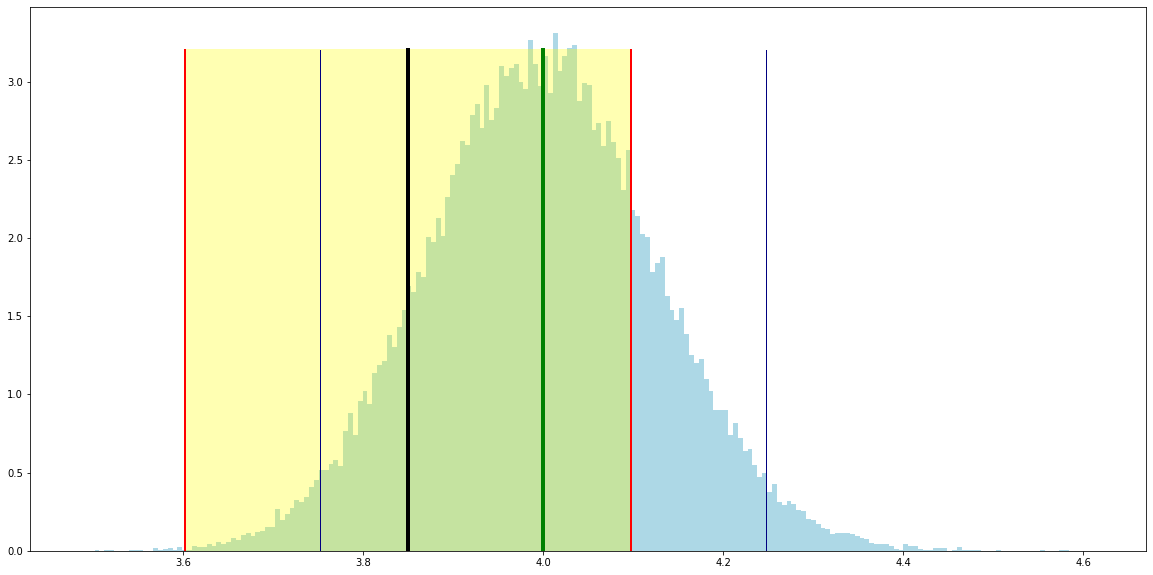

In [0]:
# the interval we create cover the population mean because it is within 95% range from population mean
plt.figure(figsize=(20,10))

plt.hist(meansample, 200, density=True, color='lightblue')
plt.plot([mu,mu],[0, 3.2], 'k-', lw=4, color='green')
plt.plot([mu-(1.96*sigma/np.sqrt(samplesize)),mu-(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=1, color='navy')
plt.plot([mu+(1.96*sigma/np.sqrt(samplesize)),mu+(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=1, color='navy')
plt.plot([m,m],[0, 3.2], 'k-', lw=4, color='black')
plt.plot([m-(1.96*ss),m-(1.96*ss)],[0, 3.2], 'k-', lw=2, color='red')
plt.plot([m+(1.96*ss),m+(1.96*ss)],[0, 3.2], 'k-', lw=2, color='red')
# Create a Rectangle patch
plt.gca().add_patch(plt.Rectangle((m-(1.96*ss), 0),2*(1.96*ss),3.21, fill=True, linewidth=3, fc=(1,1,0,0.3)))
plt.xlim(3.43, 4.67) 
plt.show()

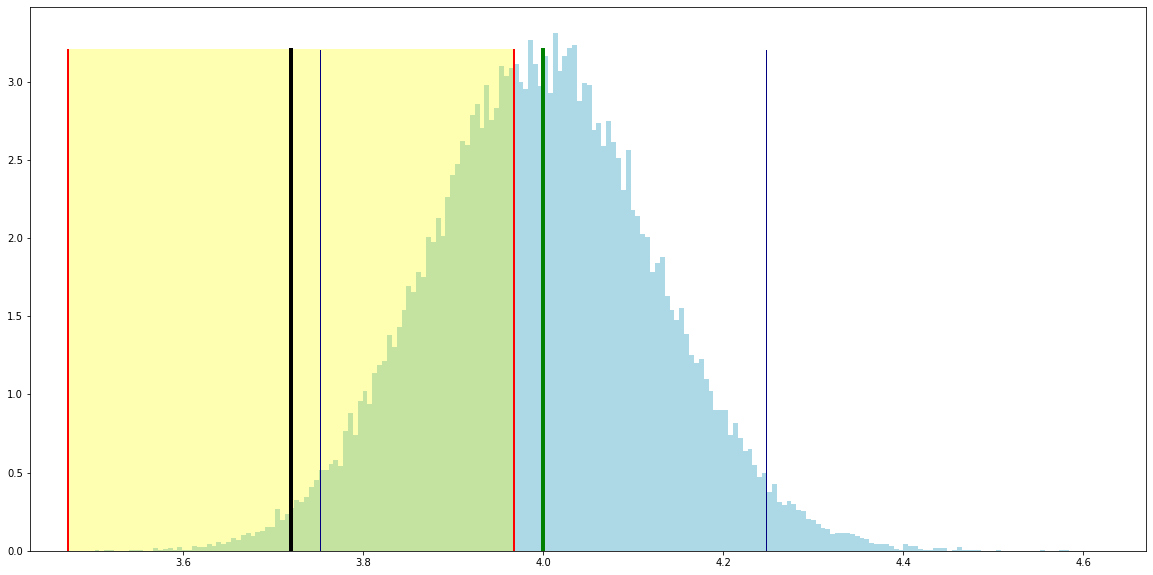

In [0]:
# if the interval is not within 95% range from population mean the interval will not cover the true population mean
plt.figure(figsize=(20,10))
m = 3.72
plt.hist(meansample, 200, density=True, color='lightblue')
plt.plot([mu,mu],[0, 3.2], 'k-', lw=4, color='green')
plt.plot([mu-(1.96*sigma/np.sqrt(samplesize)),mu-(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=1, color='navy')
plt.plot([mu+(1.96*sigma/np.sqrt(samplesize)),mu+(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=1, color='navy')
plt.plot([m,m],[0, 3.2], 'k-', lw=4, color='black')
plt.plot([m-(1.96*ss),m-(1.96*ss)],[0, 3.2], 'k-', lw=2, color='red')
plt.plot([m+(1.96*ss),m+(1.96*ss)],[0, 3.2], 'k-', lw=2, color='red')
# Create a Rectangle patch
plt.gca().add_patch(plt.Rectangle((m-(1.96*ss), 0),2*(1.96*ss),3.21, fill=True, linewidth=3, fc=(1,1,0,0.3)))
plt.xlim(3.43, 4.67) 
plt.show()

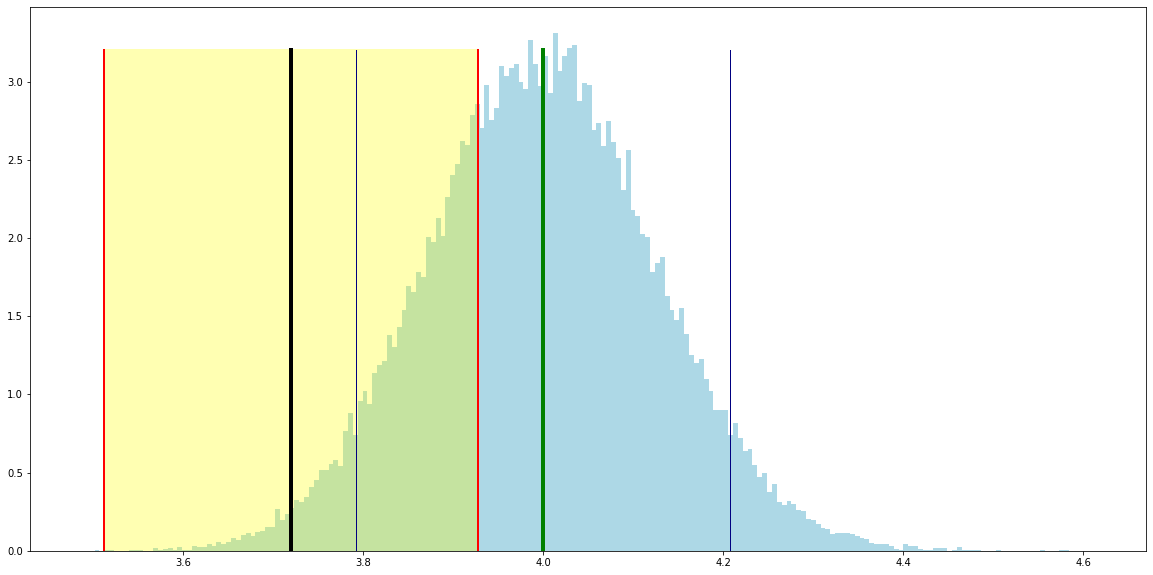

In [0]:
# use 90% instead of 95%
plt.figure(figsize=(20,10))
m = 3.72
plt.hist(meansample, 200, density=True, color='lightblue')
plt.plot([mu,mu],[0, 3.2], 'k-', lw=4, color='green')
# 90 percent of the data within 1.645 standard deviations from mean
plt.plot([mu-(1.645*sigma/np.sqrt(samplesize)),mu-(1.645*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=1, color='navy')
plt.plot([mu+(1.645*sigma/np.sqrt(samplesize)),mu+(1.645*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=1, color='navy')
plt.plot([m,m],[0, 3.2], 'k-', lw=4, color='black')
plt.plot([m-(1.645*ss),m-(1.645*ss)],[0, 3.2], 'k-', lw=2, color='red')
plt.plot([m+(1.645*ss),m+(1.645*ss)],[0, 3.2], 'k-', lw=2, color='red')
# Create a Rectangle patch
plt.gca().add_patch(plt.Rectangle((m-(1.645*ss), 0),2*(1.645*ss),3.21, fill=True, linewidth=3, fc=(1,1,0,0.3)))
plt.xlim(3.43, 4.67) 
plt.show()